In [104]:
#importing libraries and required excel file
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("DataScience_jobs.csv",index_col = 0)
df

,roles,companies,locations,experience,skills
0,Data Scientist/ Academic Counselor,GREAT LAKES E-LEARNING SERVICES PRIVATE LIMITED,"Chennai, Bengaluru",2-7 Yrs,Data Science\nArtificial Intelligence\ntrainin...
1,Data Scientist,Bigshyft Hiring for Decision Point Analytics,Gurgaon,2-5 Yrs,Java\nHadoop\nData Mining\nPython\nSQL
2,Data Scientist,Shell India Markets Private Limited,Chennai,5-7 Yrs,Data Science\nMultivariate Analysis\nFactor An...
3,Senior Data Scientist - IIT/NIT/BITS,AlgonoX Technologies,Hyderabad,2-5 Yrs,Data Science\nJava\nC++\nDocker\nArtificial In...
4,"Data Scientist, NLP",Fractal Analytics Ltd,Bengaluru,3-7 Yrs,deep learning\ncustomer analytics\nStatistical...
...,...,...,...,...,...
995,Data Analyst,SUPPORT STAR CORPORATE SERVICES PVT. LTD.,Hyderabad,2-5 Yrs,Statistical modeling\nmodel validation\nSAS\nm...
996,Machine Learning Manager - R/python/java,Career Maker,Hyderabad,3-8 Yrs,Java\nR\nC++\nMap - Reduce\nMachine Learning M...
997,Senior Manager - Engineering,Indegene Private Limited,Bengaluru,5-10 Yrs,Pytorch\nTensorflow\nData Science\nJava\nNLP\n...
998,Data Analyst- ( H/ F ),Societe Generale Global Solution Centre Pvt Ltd,Chennai,12-16 Yrs,Data Science\nPredictive Modeling\nR\nNLP\nNoS...


In [105]:
#finding if there are any null values
df.isna().sum()

roles         0
companies     0
locations     0
experience    0
skills        2
dtype: int64

In [106]:
#dropping the null values
df = df.dropna()
df.isna().sum()

roles         0
companies     0
locations     0
experience    0
skills        0
dtype: int64

In [107]:
#removing duplicates from the dataframe
print("The shape of the data frame before removing duplicates is : ",df.shape)
df = df.drop_duplicates(keep = 'first')
print("The shape of the data frame after removing duplicates is : ",df.shape)

The shape of the data frame before removing duplicates is :  (998, 5)
The shape of the data frame after removing duplicates is :  (776, 5)


In [108]:
#Seperating different skills and locations
df.skills = [skill.split("\n") for skill in df.skills]
df.locations = [location.split(",") for location in df.locations]
df[15:20]

,roles,companies,locations,experience,skills
15,Sr. Data Scientist,Orcapod Consulting Services Private Limited,[Bengaluru],6-10 Yrs,"[Data Science, Statistical Modeling, Python, R..."
16,Senior Data Scientist,Johnson Controls India Private Limited,[Bengaluru(Whitefield)],5-6 Yrs,"[NLP, Image Processing, Natural Language Proce..."
17,Data Scientist- NLP/Deep Learning- Mumbai (5+ ...,CRESCENDO GLOBAL LEADERSHIP HIRING INDIA PRIVA...,[Mumbai],5-8 Yrs,"[Data Science, NLP, Deep Learning, Java, Algor..."
18,Data Scientist,Incedo Technology Solutions Ltd.,"[Pune, Delhi NCR]",5-10 Yrs,"[Data Science, NLP, Logistic Regression, Data ..."
19,Data Scientist (Machine Learning)/Artificial I...,GrayRipples.com,"[Bengaluru, Hyderabad]",1-6 Yrs,"[Artificial Intelligence, Machine Learning]"


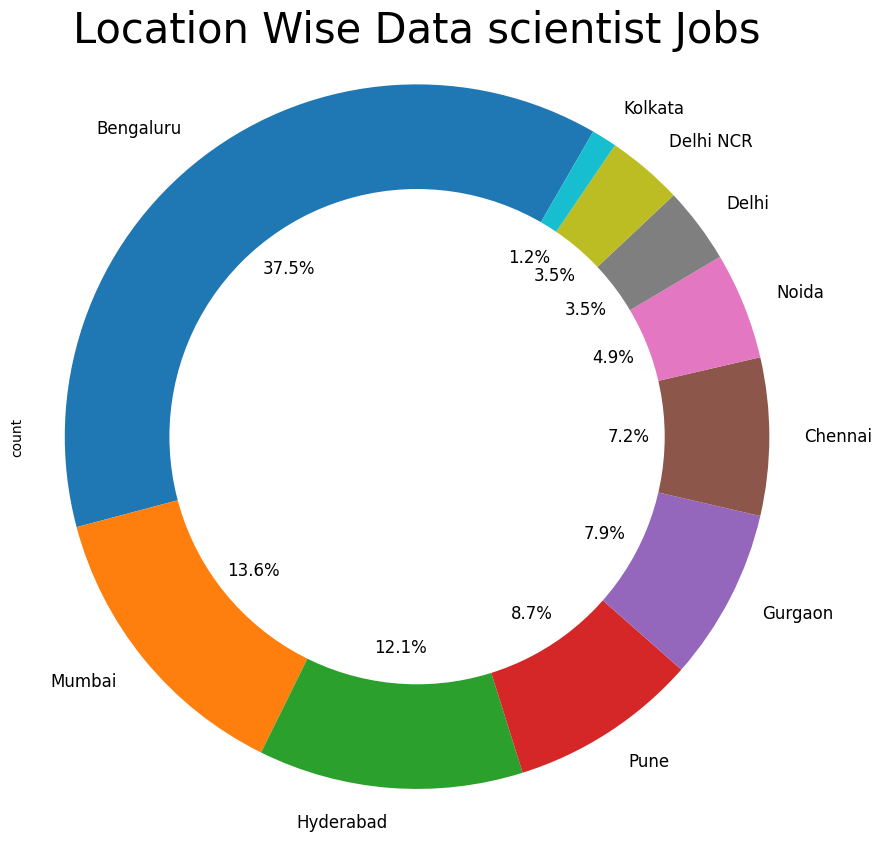

In [49]:
#Plotting for location wise job openings
df.locations.apply(pd.Series).stack().str.strip().value_counts()[:10].plot.pie(figsize=(10,10),startangle=60,autopct='%1.1f%%',fontsize=12)
plt.title("Location Wise Data scientist Jobs",fontsize=30)

centre_circle = plt.Circle((0,0),0.70,color='white', fc='white',linewidth=1.5)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.show()

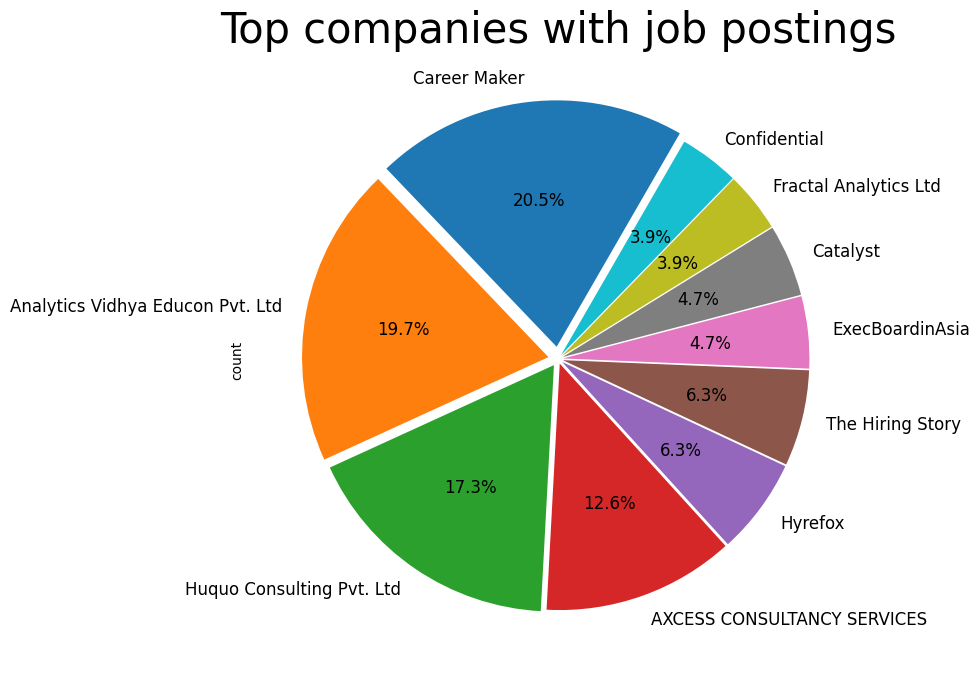

In [120]:
#Plotting for Top recruiters in Data science
df["companies"].value_counts()[:10].plot.pie(figsize = (8,8) ,explode=[0.05,0.04,0.03,0.02,0.02,0.02,0.02,0.02,0.02,0.02], startangle = 60, autopct = "%1.1f%%", fontsize = 12)
plt.title("Top companies with job postings" ,fontsize = 30)
plt.show()

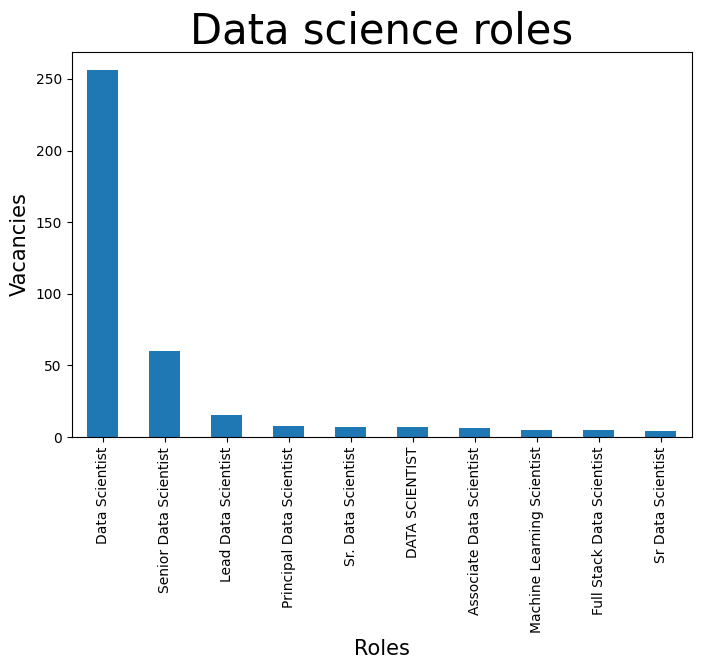

In [110]:
#Plotting for various roles in data science and its vacancies
df["roles"].value_counts()[:10].plot.bar(figsize = (8,5), fontsize = 10)
plt.title("Data science roles",fontsize = 30)
plt.ylabel('Vacancies',fontsize =15)
plt.xlabel('Roles',fontsize = 15)
plt.show()

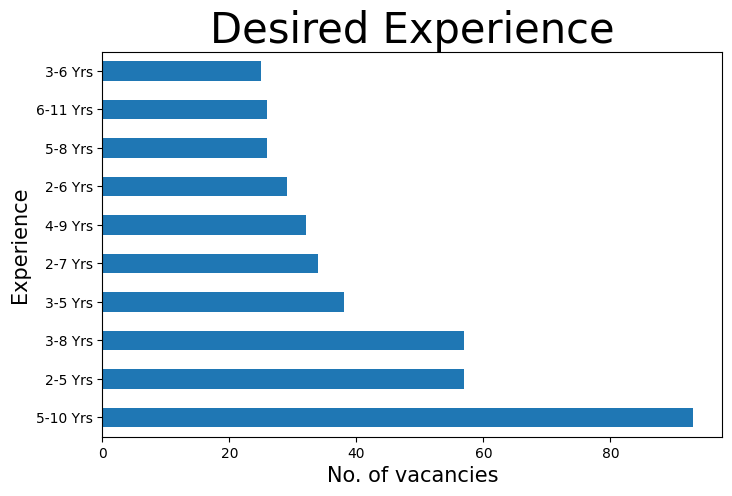

In [111]:
#Plotting for desried experience for vacancies
df["experience"].value_counts()[:10].plot.barh(figsize = (8,5), fontsize = 10)
plt.xlabel("No. of vacancies", fontsize=15)
plt.ylabel("Experience",fontsize = 15)
plt.title("Desired Experience",fontsize = 30)
plt.show()

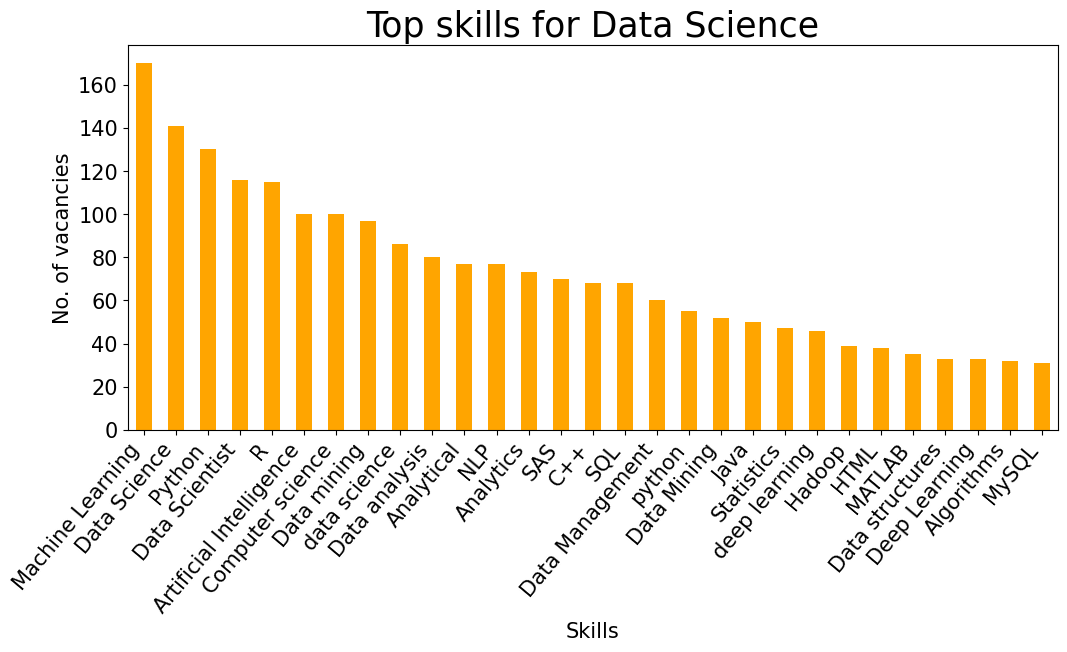

In [112]:
#Analysing the top skills required for data science
df.skills.apply(pd.Series).stack().value_counts()[1:30].plot.bar(figsize = (12,5), fontsize = 15, color = 'orange')
plt.xticks(rotation = 50, ha = "right")
plt.xlabel("Skills", fontsize = 15)
plt.ylabel("No. of vacancies", fontsize = 15)
plt.title("Top skills for Data Science", fontsize = 25)
plt.show()

In [113]:
#Analysing the must required skills by creating another dataframe
df2 = pd.DataFrame(df.skills.apply(pd.Series).stack().value_counts()[1:].reset_index())
df2.columns = ["Skills" , "Count"]
df2.head()

,Skills,Count
0,Machine Learning,170
1,Data Science,141
2,Python,130
3,Data Scientist,116
4,R,115


In [114]:
#creating a dictionary to analyse the must required skills for data science
datascience = {}
datascience['Statistics'] = df2["Count"][df2["Skills"].str.contains('stat', regex = True)].sum()
datascience['Machine Learning'] = df2["Count"][df2["Skills"].str.contains('machine'or 'ml', regex = True)].sum()
datascience['Data Analysis'] = df2["Count"][df2["Skills"].str.contains('analysis', regex = True)].sum()
datascience['Data Mining'] = df2["Count"][df2["Skills"].str.contains('mining', regex = True)].sum()
datascience['nlp'] = df2["Count"][df2["Skills"].str.contains('nlp' or 'natural', regex = True)].sum()
datascience['Deep Learning'] = df2["Count"][df2["Skills"].str.contains('deep learning', regex = True)].sum()
from operator import itemgetter
datascience = dict(sorted(datascience.items(), key=itemgetter(1), reverse=True))
datascience
                   

{'Data Analysis': 134,
 'Data Mining': 125,
 'Deep Learning': 47,
 'Machine Learning': 32,
 'Statistics': 12,
 'nlp': 11}

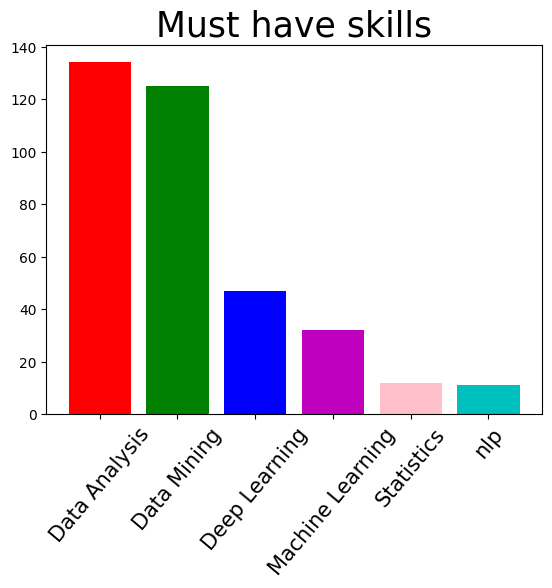

In [115]:
#Plotting the must have skills
plt.bar(datascience.keys(), datascience.values(), color = ["r" , "g", "b", "m", "pink", "c"])
plt.xticks(rotation = 50, fontsize =15)
plt.title("Must have skills",fontsize = 25)
plt.show()

In [116]:
#Analysing languages on demand
languages={}
languages["Python"]=df2["Count"][df2['Skills'].str.contains('python', regex=True)].sum()
languages["R"]=df2["Count"][df2['Skills'].str.contains('^r$', regex=True)].sum()
languages["Matlab"]=df2["Count"][df2['Skills'].str.contains('matlab', regex=True)].sum()
languages["Java"]=df2["Count"][df2['Skills'].str.contains('java', regex=True)].sum()
sql=df2[df2['Skills'].str.contains('sql', regex=True)]
languages["Sql"]=sql["Count"][~sql['Skills'].str.contains('no', regex=True)].sum()
languages=dict(sorted(languages.items(), key=itemgetter(1),reverse=True))
languages

{'Python': 61, 'Sql': 21, 'R': 12, 'Matlab': 5, 'Java': 5}

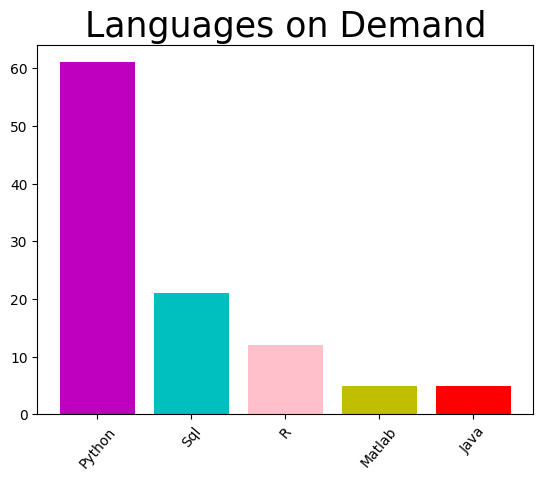

In [117]:
#plotting for languages on demand
plt.bar(languages.keys(), languages.values(), color = ['m' , 'c' , 'pink' , 'y' , 'r', 'b' , 'g'])
plt.xticks(rotation = 50, fontsize=10)
plt.title("Languages on Demand", fontsize=25)
plt.show()

In [118]:
#Visualisation tools used
tools = {}
tools["Tableau"] = df2["Count"][df2["Skills"].str.contains("tableau", regex = True)].sum()
tools["Power Bi"] = df2["Count"][df2["Skills"].str.contains("power",regex = True)].sum()
tools

{'Tableau': 15, 'Power Bi': 3}

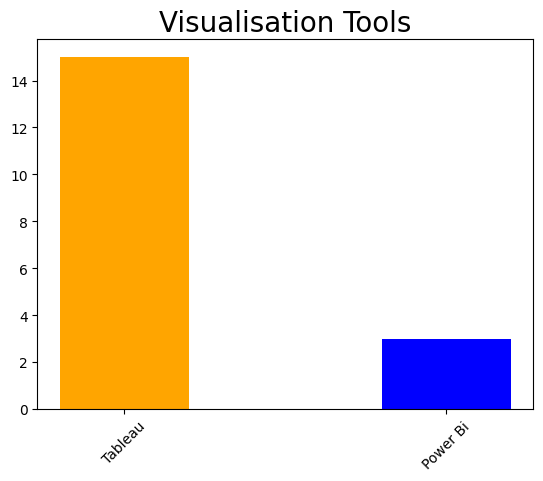

In [119]:
#Plot for the tools
plt.bar(tools.keys(),tools.values(), color = [ "orange" , "blue"],width = 0.4)
plt.xticks(rotation = 45, fontsize=10)
plt.title("Visualisation Tools", fontsize=20)
plt.show()